## Import Library

In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/fernandomichael17/capstone-nlp-project/main/data/dataset_kalimat_kasar_baik_terbaru_final%20(1).csv"
kalimat_df = pd.read_csv(url)
kalimat_df.head()

,kalimat,label
0,njir,1
1,bjir,1
2,anjing,1
3,anjinglah,1
4,Nurani anjingmu kebanyakan makan anjing sama b...,1


Kalimat yang dilabeli 1 adalah kalimat yang kasar, sedangkan kalimat yang dilabeli 0 adalah kalimat yang normal

In [ ]:
kalimat_df['label'].value_counts()

label
1    1792
0    1399
Name: count, dtype: int64

In [ ]:
kalimat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kalimat  3191 non-null   object
 1   label    3191 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.0+ KB


In [ ]:
kalimat_df.head()

,kalimat,label
0,njir,1
1,bjir,1
2,anjing,1
3,anjinglah,1
4,Nurani anjingmu kebanyakan makan anjing sama b...,1


## Class Distribution

In [ ]:
print(kalimat_df['label'].value_counts())

label
1    1792
0    1399
Name: count, dtype: int64


In [ ]:
kalimat_df.sample(10)

,kalimat,label
1019,"PENGEN GUA GAMPAR ANJING, CEWE GILA",1
823,JANGAN JANJIIN GUA APAPUN KALO GABISA NEPATIN ...,1
225,mana ada kerut2nya lg ud kyk peler raksasa,1
980,ibu kartini susah-susah memperjuangkan hak wan...,1
2517,Anjing sumpahw kira td yg reply mba tara. Gant...,1
452,Lah anying bego bgt klo gt kan malah jd bukti ...,1
2714,Bgst orang yg ngutang sama gua kebawa sampe mi...,1
1194,palalu gua siram pake air comberan.,1
172,Tuhan ga minta lu begitu dongo,1
2080,"yg manis yaa kak, kayak kakaknya manis",0


## Text Preprocessing

### Case Folding
Tahap untuk konversi text menjadi suatu bentuk yang standar.

In [ ]:
import re

def preprocces_sentences(data):
    temp_sentence = []

    for sentence in data:
        sentence = re.sub(r"(?:\@|https?\://)\S+", "", sentence)

        # removal of links[https://blabala.com]
        # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
        sentence = re.sub(r"http\S+", "", sentence)

        # Mencocokkan dan menghapus username
        sentence = re.sub(r"<[^>]+>", "", sentence, flags=re.IGNORECASE)

        # removal of new line
        sentence = re.sub('\n', '', sentence)

        # removal of RT
        sentence = re.sub('RT', '', sentence)

        # removal of punctuations and numbers
        sentence = re.sub("[^a-zA-Z^']", " ", sentence)
        sentence = re.sub(" {2,}", " ", sentence)

        # remove leading and trailing whitespace
        sentence = sentence.strip()

        # remove whitespace with a single space
        sentence = re.sub(r'\s+', ' ', sentence)

        # convert text to Lowercase
        sentence = sentence.lower()
        temp_sentence.append(sentence)

    return temp_sentence


In [ ]:
kalimat_df.isnull().sum()

kalimat    0
label      0
dtype: int64

In [ ]:
kalimat_df['proccesed_text']=(preprocces_sentences(kalimat_df['kalimat']))
kalimat_df.head()

,kalimat,label,proccesed_text
0,njir,1,njir
1,bjir,1,bjir
2,anjing,1,anjing
3,anjinglah,1,anjinglah
4,Nurani anjingmu kebanyakan makan anjing sama b...,1,nurani anjingmu kebanyakan makan anjing sama b...


### Tokenizing

Proses pemecahan perkata menggunakan fungsi .word_tokenize() pada library NLTK.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [ ]:
kalimat_df['tokenized'] = tokenized(kalimat_df['proccesed_text'])
kalimat_df.head()

,kalimat,label,proccesed_text,tokenized
0,njir,1,njir,[njir]
1,bjir,1,bjir,[bjir]
2,anjing,1,anjing,[anjing]
3,anjinglah,1,anjinglah,[anjinglah]
4,Nurani anjingmu kebanyakan makan anjing sama b...,1,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ..."


### Stemming

Tahap untuk menghilangkan suffix dan prefix pada token/kata (reduce inflected), sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali kebentuk dasarnya. cth: "membuat" = "buat"

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(sentence) for sentence in data]

In [ ]:
kalimat_df['stemmed'] = kalimat_df['tokenized'].apply(stemming)
kalimat_df.head()

,kalimat,label,proccesed_text,tokenized,stemmed
0,njir,1,njir,[njir],[njir]
1,bjir,1,bjir,[bjir],[bjir]
2,anjing,1,anjing,[anjing],[anjing]
3,anjinglah,1,anjinglah,[anjinglah],[anjing]
4,Nurani anjingmu kebanyakan makan anjing sama b...,1,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ..."


In [ ]:
kalimat_df['stemmed'][789]

['merinding',
 'bgt',
 'liat',
 'muka',
 'tuh',
 'bot',
 'di',
 'kata',
 'keren',
 'kali',
 'njs']

### Slang Word Removal

Membuat dictionary normalisasi kata-kata cth: "yg" = "yang"

In [ ]:
import requests
import json
from io import StringIO
import csv

slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
slang_word2 = requests.get('https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv').text

slang_word_dict = json.loads(slang_word)
slang_word2_dict = {}
csv_reader = csv.reader(StringIO(slang_word2))
for row in csv_reader:
    if row:
        slang, standard = row
        slang_word2_dict[slang] = standard

slang_word_merge = {**slang_word_dict, **slang_word2_dict}

print(slang_word_merge)

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'aku', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'aku', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'say', 'ayank': 'sayang', 'b4': 'berempat', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'bereskan', 'bete': 'sebal', 'beud': 'banget

In [ ]:
slang_word_merge.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'aku'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'aku'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'say'), ('ayank', 'sayang'), ('b4', 'berempat'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong', '

In [ ]:
slang_df = pd.DataFrame(slang_word_merge.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [ ]:
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [ ]:
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [ ]:
slang_dict.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'aku'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'aku'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'say'), ('ayank', 'sayang'), ('b4', 'berempat'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong', '

In [ ]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [ ]:
kalimat_df['no_slang'] = kalimat_df['stemmed'].apply(removeSlang)
kalimat_df.head()

,kalimat,label,proccesed_text,tokenized,stemmed,no_slang
0,njir,1,njir,[njir],[anjir],[anjir]
1,bjir,1,bjir,[bjir],[bjir],[bjir]
2,anjing,1,anjing,[anjing],[anjing],[anjing]
3,anjinglah,1,anjinglah,[anjinglah],[anjing],[anjing]
4,Nurani anjingmu kebanyakan makan anjing sama b...,1,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, banyak, makan, anjing, sama, ..."


### Removing Stopwords

Tahapan untuk mengambil kata-kata penting pada tokens yang dihasilkan oleh proses sebelumnya. Kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna disebut Stopword. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
kalimat_df['no_stop']=removeStopWords(kalimat_df['no_slang'])
kalimat_df.head()

,kalimat,label,proccesed_text,tokenized,stemmed,no_slang,no_stop
0,njir,1,njir,[njir],[anjir],[anjir],[anjir]
1,bjir,1,bjir,[bjir],[bjir],[bjir],[bjir]
2,anjing,1,anjing,[anjing],[anjing],[anjing],[anjing]
3,anjinglah,1,anjinglah,[anjinglah],[anjing],[anjing],[anjing]
4,Nurani anjingmu kebanyakan makan anjing sama b...,1,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, makan, anjing, babi, tingka, ..."


In [ ]:
kalimat_df['final'] = kalimat_df['no_stop'].apply(lambda x: ' '.join(x))
kalimat_df.head()

,kalimat,label,proccesed_text,tokenized,stemmed,no_slang,no_stop,final
0,njir,1,njir,[njir],[anjir],[anjir],[anjir],anjir
1,bjir,1,bjir,[bjir],[bjir],[bjir],[bjir],bjir
2,anjing,1,anjing,[anjing],[anjing],[anjing],[anjing],anjing
3,anjinglah,1,anjinglah,[anjinglah],[anjing],[anjing],[anjing],anjing
4,Nurani anjingmu kebanyakan makan anjing sama b...,1,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, makan, anjing, babi, tingka, ...",nurani anjing makan anjing babi tingka laku be...


## Combining Cleaned Kalimat & Label

In [ ]:
data1 = kalimat_df[['final']]
data2 = kalimat_df[['label']]
final_dataset = pd.concat([data1, data2], axis=1)
final_dataset.head()

,final,label
0,anjir,1
1,bjir,1
2,anjing,1
3,anjing,1
4,nurani anjing makan anjing babi tingka laku be...,1


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   final   3191 non-null   object
 1   label   3191 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.0+ KB


## Text Vectorization with TF-IDF

Kombinasi dari frekuensi kata (TF) dan kebalikan dari frekuensi dokumen (IDF).
TF mengukur seberapa sering sebuah kata muncul dalam dokumen.
IDF mengurangi bobot kata-kata umum yang muncul di banyak dokumen.
Hasilnya adalah vektor yang memberikan bobot lebih tinggi pada kata-kata yang penting dan jarang muncul.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
final = final_dataset['final']
label = final_dataset['label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(final)
tfidf_vector.shape

(3191, 5159)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2552, 5159)
(639, 5159)
(2552,)
(639,)


In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

max_tf_idfs = X_train.max(0).toarray()[0]
sorted_tf_idxs = max_tf_idfs.argsort()
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs]

smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [ ]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 mmmm       0.0
hamidun    0.0
ngina      0.0
halus      0.0
ntahlah    0.0
baring     0.0
heheu      0.0
bassic     0.0
healing    0.0
nguatin    0.0
dtype: float64


Most important words:
 cupu       1.0
lanjiao    1.0
bjir       1.0
mara       1.0
gampar     1.0
lonte      1.0
lesbi      1.0
tobrut     1.0
hijau      1.0
tonjok     1.0
dtype: float64


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
print(final_dataset[['final']][final_dataset[['label']] == 1])

     final
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
...    ...
3186   NaN
3187   NaN
3188   NaN
3189   NaN
3190   NaN

[3191 rows x 1 columns]


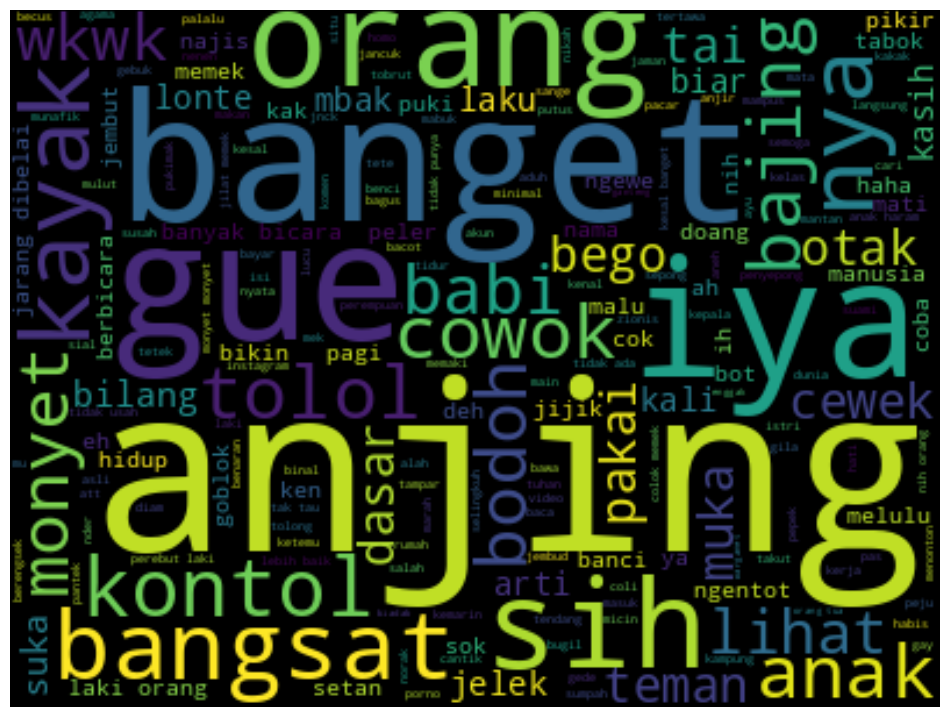

In [ ]:
klmt_kasar = ' '.join([word for word in final_dataset['final'][final_dataset['label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(klmt_kasar)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

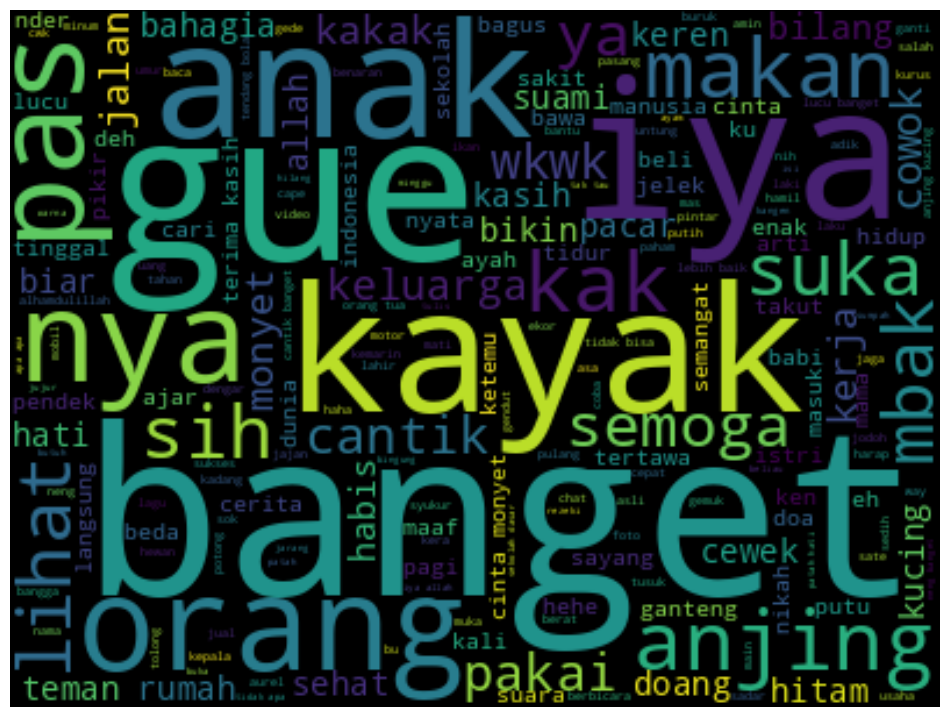

In [ ]:
klmt_normal = ' '.join([word for word in final_dataset['final'][final_dataset['label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(klmt_normal)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Things To Do:


*   Buat salinan dari colab ini
*   Mulai bikin model dan training model sendiri2
*   Nanti kita bandingkan akurasi dari model2 kita masing2





In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model
import pickle

In [ ]:
# TensorFlow Tokenizer and Padding
max_words = 10000  # Max number of words to keep, based on word frequency
max_len = 100  # Max length of each sequence

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(kalimat_df['final'])

# Convert sentences to sequences
sequences = tokenizer.texts_to_sequences(kalimat_df['final'])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
labels = kalimat_df['label'].values

# Encode labels (binary classification)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.93 and logs.get('accuracy')>0.93):
      print("\nReached 93% in training accuracy and 93% in validation accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
train_padded, validation_padded, train_labels, validation_labels = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# Model definition
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Callback function
callbacks = myCallback()

# Model compilation
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Model training
history = model.fit(train_padded, train_labels, verbose=True, validation_data=(validation_padded, validation_labels), epochs=50, batch_size=32, callbacks=callbacks)

Epoch 1/50
80/80 [==============================] - 8s 83ms/step - loss: 0.6795 - accuracy: 0.5694 - val_loss: 0.6554 - val_accuracy: 0.7653
Epoch 2/50
80/80 [==============================] - 2s 30ms/step - loss: 0.5321 - accuracy: 0.7763 - val_loss: 0.3855 - val_accuracy: 0.8529
Epoch 3/50
80/80 [==============================] - 2s 22ms/step - loss: 0.2383 - accuracy: 0.9099 - val_loss: 0.2568 - val_accuracy: 0.8873
Epoch 4/50
80/80 [==============================] - 1s 11ms/step - loss: 0.0946 - accuracy: 0.9698 - val_loss: 0.2188 - val_accuracy: 0.9139
Epoch 5/50
80/80 [==============================] - 1s 9ms/step - loss: 0.0496 - accuracy: 0.9855 - val_loss: 0.2403 - val_accuracy: 0.9045
Epoch 6/50
80/80 [==============================] - 1s 11ms/step - loss: 0.0286 - accuracy: 0.9941 - val_loss: 0.2390 - val_accuracy: 0.9124
Epoch 7/50
80/80 [==============================] - 1s 10ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.2399 - val_accuracy: 0.9155
Epoch 8/50
80/

In [ ]:
# Save model and tokenizer for later use
model.save('text_classification_model.h5')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

def preprocess_sentence(sentence):
    sentence = re.sub(r"(?:\@|https?\://)\S+", "", sentence)
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = re.sub(r"<[^>]+>", "", sentence, flags=re.IGNORECASE)
    sentence = re.sub('\n', '', sentence)
    sentence = re.sub('RT', '', sentence)
    sentence = re.sub("[^a-zA-Z^']", " ", sentence)
    sentence = re.sub(" {2,}", " ", sentence)
    sentence = sentence.strip()
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = sentence.lower()
    return sentence

# Remove slang words
def removeSlang(data):
    words = data.split()  # Split string into list of words
    for i, word in enumerate(words):
        words[i] = slang_dict.get(word, word)  # Replace slang with actual word if exists
    return ' '.join(words)  # Join words back into string

def removeStopWords(data):
    stop_words = set(stopwords.words('indonesian'))
    words = data.split()  # Split string into list of words
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)  # Join words back into string

def predict_sentence_class(sentence):
    processed_sentence = preprocess_sentence(sentence)
    tokenized_sentence = nltk.word_tokenize(processed_sentence)
    stemmed_sentence = ' '.join(stemming(tokenized_sentence))
    rmvSlang_sentence = removeSlang(stemmed_sentence)
    rmvStopWords_sentence = removeStopWords(rmvSlang_sentence)
    sequence = tokenizer.texts_to_sequences([rmvStopWords_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    prediction = model.predict(padded_sequence)[0][0]
    class_label = "badword" if prediction >= 0.56 else "goodword"
    return class_label, prediction

# Example sentence
input_sentence = "kamu kok gitu sih?"
class_label, prediction_prob = predict_sentence_class(input_sentence)
print(f"Sentence: '{input_sentence}'")
print(f"Class: {class_label}")
print(f"Prediction Probability: {prediction_prob}")

NameError: name 'model' is not defined